In [1]:
import os
import tensorflow as tf
import numpy as np
import shutil
import random
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [9]:
path = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\Dataset"

In [3]:
new_classes = ['SBW_SB', 'SBW_B', 'SBW_K']

In [4]:
print(f"JUMLAH CLASS : {len(new_classes)}")
print("----------------") 
print(f"1. {new_classes[0]}")
print(f"2. {new_classes[1]}")
print(f"1. {new_classes[2]}")

JUMLAH CLASS : 3
----------------
1. SBW_SB
2. SBW_B
1. SBW_K


In [7]:
from PIL import Image

In [10]:
dataset = os.path.join(path)
print(os.listdir(dataset))

['SBW_B', 'SBW_K', 'SBW_SB', 'SBW_SK']


In [11]:
for x in new_classes:
    path = os.path.join(dataset, x)
    print(x)
    print("-------------------------------")
    images = os.listdir(path)
    for z in range(2):
        img_path = os.path.join(path, images[z])
        img = Image.open(img_path)
        print(f"{z+1}. Size Gambar : {img.size}\n")

SBW_SB
-------------------------------
1. Size Gambar : (3024, 4032)

2. Size Gambar : (3024, 4032)

SBW_B
-------------------------------
1. Size Gambar : (3024, 4032)

2. Size Gambar : (3024, 4032)

SBW_K
-------------------------------
1. Size Gambar : (3024, 4032)

2. Size Gambar : (3024, 4032)



In [13]:
path_baru = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70"
path = r'C:\Users\Latitude 5480\Documents\Program_Skripsi\Dataset'
train_dir = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Training Data"
valid_dir = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Validation Data"
test_dir = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Testing Data"

In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split

categories = os.listdir(path)

for category in new_classes:
    category_path = os.path.join(path, category)

    # Debug jalur
    print(f"Processing category: {category_path}")

    if os.path.isdir(category_path):  # Cek jika direktori
        all_images = os.listdir(category_path)

        if len(all_images) < 3:
            print(f"Skipping category '{category}' due to insufficient data ({len(all_images)} images).")
            continue

        # Split data
        train_images, temp_images = train_test_split(all_images, test_size=0.3, random_state=42)
        valid_images, test_images = train_test_split(temp_images, test_size=0.333, random_state=42)

        # Buat subfolder
        train_subdir = os.path.join(train_dir, category)
        valid_subdir = os.path.join(valid_dir, category)
        test_subdir = os.path.join(test_dir, category)

        os.makedirs(train_subdir, exist_ok=True)
        os.makedirs(valid_subdir, exist_ok=True)
        os.makedirs(test_subdir, exist_ok=True)

        # Debug pembuatan direktori
        print(f"Directories created for {category}:")
        print(f"Train: {train_subdir}")
        print(f"Valid: {valid_subdir}")
        print(f"Test: {test_subdir}")

        # Copy files
        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_subdir, img))
        for img in valid_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(valid_subdir, img))
        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_subdir, img))

        print(f"Dataset split completed for '{category}'.")

Processing category: C:\Users\Latitude 5480\Documents\Program_Skripsi\Dataset\SBW_SB
Directories created for SBW_SB:
Train: C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Training Data\SBW_SB
Valid: C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Validation Data\SBW_SB
Test: C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Testing Data\SBW_SB
Dataset split completed for 'SBW_SB'.
Processing category: C:\Users\Latitude 5480\Documents\Program_Skripsi\Dataset\SBW_B
Directories created for SBW_B:
Train: C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Training Data\SBW_B
Valid: C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Validation Data\SBW_B
Test: C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Testing Data\SBW_B
Dataset split completed for 'SBW_B'.
Processing category: C:\Users\Latitude 5480\Documents\Program_Skripsi\Dataset\SBW_K
Directories created for SBW_K:
Train: C:\Users\Latitude 5480

In [15]:

# Path ke dataset
train_dir = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Training Data"
valid_dir = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Validation Data"

# Ukuran gambar dan batch size
img_height, img_width = 224, 224  # Meningkatkan ukuran gambar
batch_size = 32  # Mengurangi batch size untuk stabilitas pelatihan

In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Direktori input dan output
input_dir = train_dir  # Direktori asal
output_dir = input_dir  # Direktori penyimpanan hasil augmentasi

# Pastikan direktori output ada
os.makedirs(output_dir, exist_ok=True)

# ImageDataGenerator untuk augmentasi
augmentor = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.5,  # Gunakan titik desimal
    horizontal_flip=True,
    rotation_range=45,
    brightness_range=[0.8, 1.2],
    shear_range=0.2
)

# Augmentasi 10 kali lipat
for category in os.listdir(input_dir):  # Iterasi per kelas
    category_path = os.path.join(input_dir, category)
    augmented_category_path = os.path.join(output_dir, category)
    os.makedirs(augmented_category_path, exist_ok=True)

    for img_name in os.listdir(category_path):  # Iterasi per gambar
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path)  # Membaca gambar
        img_array = img_to_array(img)  # Mengonversi ke array
        img_array = img_array.reshape((1,) + img_array.shape)  # Ubah dimensi untuk generator

        # Generator untuk augmentasi
        save_prefix = os.path.splitext(img_name)[0]  # Nama file dasar
        i = 0
        for batch in augmentor.flow(
            img_array,
            batch_size=1,
            save_to_dir=augmented_category_path,
            save_prefix=save_prefix,
            save_format='jpg'
        ):
            i += 1
            if i >= 10:  # Augmentasi hingga 10 gambar
                break

    print(f"Augmentasi untuk kelas '{category}' selesai.")

Augmentasi untuk kelas 'SBW_B' selesai.
Augmentasi untuk kelas 'SBW_K' selesai.
Augmentasi untuk kelas 'SBW_SB' selesai.


In [17]:
 valid_datagen = ImageDataGenerator(rescale=1./255)

# Data training
train_data = augmentor.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',  # Menggunakan RGB
    class_mode='categorical'
)

# Data validasi
val_data = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',  # Menggunakan RGB
    class_mode='categorical'
)

Found 231 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


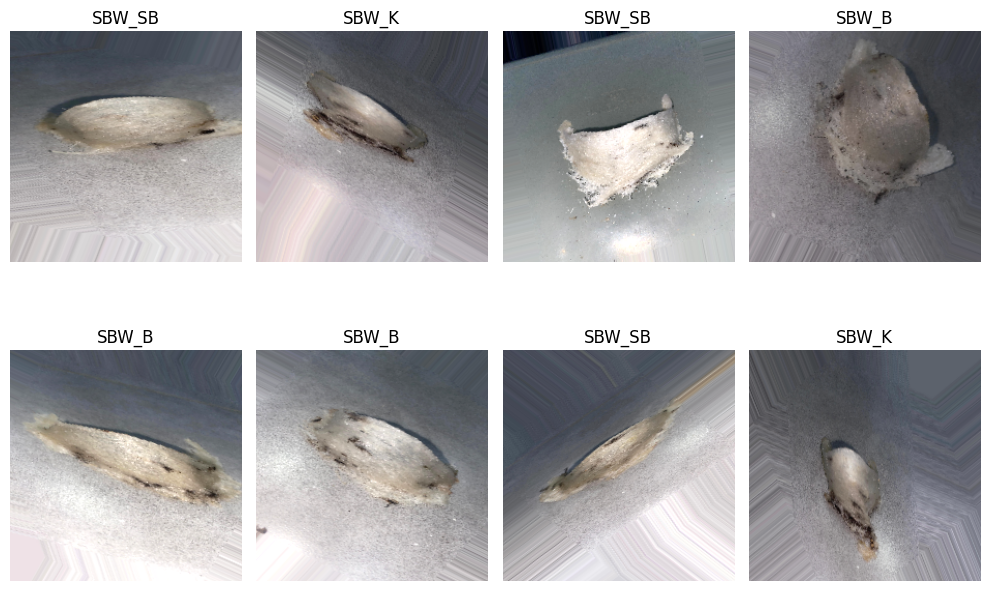

In [18]:
plt.figure(figsize=(10, 10))

# Mengambil batch pertama dari generator
images, labels = train_data.next()

for i in range(8):  # Menampilkan 8 gambar
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])  # Menampilkan gambar
    label_idx = np.argmax(labels[i])  # Mendapatkan indeks label (untuk categorical)
    plt.title(categories[label_idx])  # Menampilkan nama kategori
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
# Menggunakan VGG16 sebagai base model
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Pre-trained weights dari ImageNet
    include_top=False,   # Menghapus fully connected layer terakhir
    input_shape=(img_height, img_width, 3)  # Input shape untuk RGB
)

# Membekukan beberapa layer terakhir dari base model untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-2]:  # Membekukan lebih sedikit layer
    layer.trainable = False

# Menambahkan fully connected layers di atas base model
model = models.Sequential([
    base_model,
    layers.Flatten(),  # Flatten output convolusi
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Mengurangi dropout
    layers.Dense(3, activation='softmax')  # Output layer untuk binary classification
])



In [20]:
print(f"Jumlah data validasi: {len(val_data.filenames)}")
print(f"Jumlah data uji: {len(train_data.filenames)}")

Jumlah data validasi: 6
Jumlah data uji: 231


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,926,467
Trainable params: 5,571,587
Non-trainable params: 12,354,880
_________________________________________________________________


In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metrik yang dipantau
    patience=5,           # Menunggu 5 epoch tanpa perbaikan sebelum berhenti
    verbose=1,            # Menampilkan informasi ketika training dihentikan
    restore_best_weights=True  # Memulihkan bobot terbaik yang ditemukan selama pelatihan
)

# ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metrik yang dipantau
    factor=0.5,          # Pengurangan learning rate menjadi setengahnya
    patience=3,          # Menunggu 3 epoch tanpa perbaikan sebelum menurunkan learning rate
    min_lr=1e-6,         # Learning rate minimum yang bisa dicapai
    verbose=1            # Menampilkan informasi saat learning rate berkurang
)

In [23]:
# Menyertakan kedua callback saat melatih model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[early_stopping, reduce_lr],  # Menambahkan kedua callback
    verbose=1
)


Epoch 1/20
8/8 [==============================] - 94s 10s/step - loss: 1.2810 - accuracy: 0.3333 - val_loss: 1.1427 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 2/20
8/8 [==============================] - 89s 10s/step - loss: 1.1660 - accuracy: 0.3853 - val_loss: 1.0962 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/20
8/8 [==============================] - 83s 9s/step - loss: 0.9911 - accuracy: 0.5152 - val_loss: 1.0377 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/20
8/8 [==============================] - 220s 30s/step - loss: 0.9720 - accuracy: 0.5238 - val_loss: 1.0260 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 5/20
8/8 [==============================] - 76s 9s/step - loss: 0.9450 - accuracy: 0.5195 - val_loss: 0.9746 - val_accuracy: 0.6667 - lr: 1.0000e-04
Epoch 6/20
8/8 [==============================] - 90s 10s/step - loss: 0.9246 - accuracy: 0.5325 - val_loss: 0.9308 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/20
8/8 [==============================] - 89s 10s/step - 

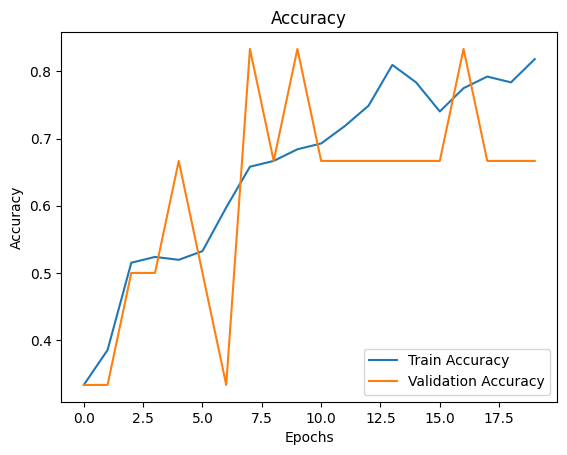

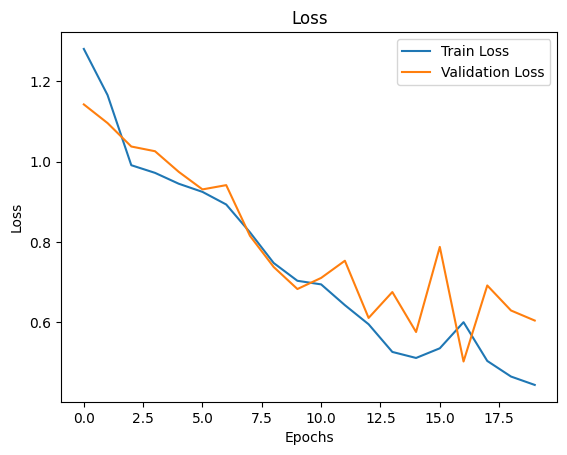

In [24]:
# Visualisasi akurasi dan loss selama pelatihan
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

In [25]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

1/1 [==============================] - 7s 7s/step - loss: 0.6040 - accuracy: 0.6667
Validation Accuracy: 0.67
Validation Loss: 0.60


In [27]:
test_dir = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Testing Data"
test_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data uji
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    color_mode='rgb', 
    class_mode='categorical',  
    shuffle=False  
)

predictions = model.predict(test_data, verbose=1)

predicted_labels = (predictions > 0.5).astype("int32")

true_labels = test_data.classes


Found 5 images belonging to 3 classes.
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 1s 989ms/step


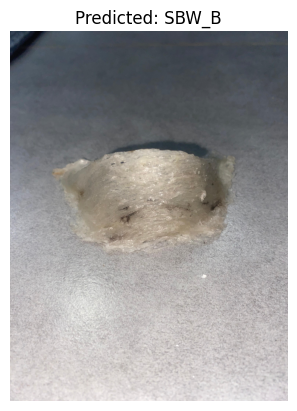

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

testing = r"C:\Users\Latitude 5480\Documents\Program_Skripsi\SplitDataset70\Testing Data\SBW_SB\SB_0010.jpg"

# Muat gambar dan lakukan preprocessing
test_image = image.load_img(testing, target_size=(224, 224))  # Ubah ukuran gambar ke input model
test_image_array = image.img_to_array(test_image)  # Konversi gambar ke array
test_image_array = test_image_array / 255.0  # Normalisasi ke skala [0, 1]
test_image_array = np.expand_dims(test_image_array, axis=0)  # Tambahkan dimensi batch

# Prediksi menggunakan model
result = model.predict(test_image_array)

predicted_index = np.argmax(result, axis=1)[0]

categories = list(test_data.class_indices.keys())  

image_show = PIL.Image.open(testing)
plt.imshow(image_show)
plt.axis('off') 
plt.title(f"Predicted: {categories[predicted_index]}")
plt.show()


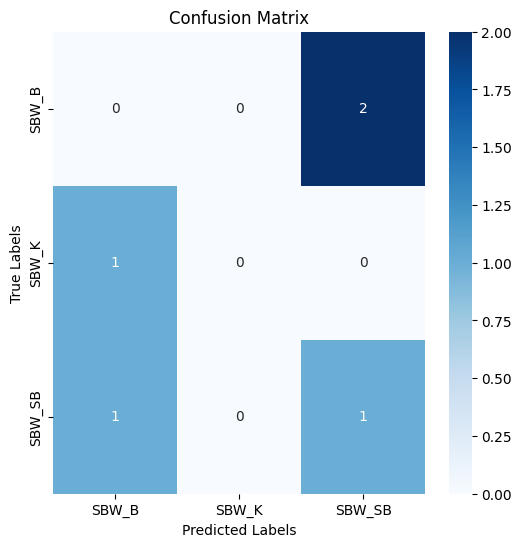

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.33      0.50      0.40         2

    accuracy                           0.20         5
   macro avg       0.11      0.17      0.13         5
weighted avg       0.13      0.20      0.16         5



C:\Users\Latitude 5480\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Latitude 5480\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Latitude 5480\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

# Visualisasi matriks kebingunguan
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(true_labels, predicted_labels))


In [42]:
for i in range(len(true_labels)):
    print(f"True label: {true_labels[i]}, Predicted: {predicted_labels[i]}")

True label: 0, Predicted: 2
True label: 0, Predicted: 2
True label: 1, Predicted: 0
True label: 2, Predicted: 2
True label: 2, Predicted: 0
